In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [5]:
# data generation 
def generateDataset(m):
    m=100
    X=np.random.randn(m)*10
    noise=np.random.randn(m)
    Y=3*X+1+noise*4
    return X,Y


In [6]:
X,y=generateDataset(100)
print(X.shape,y.shape)

(100,) (100,)


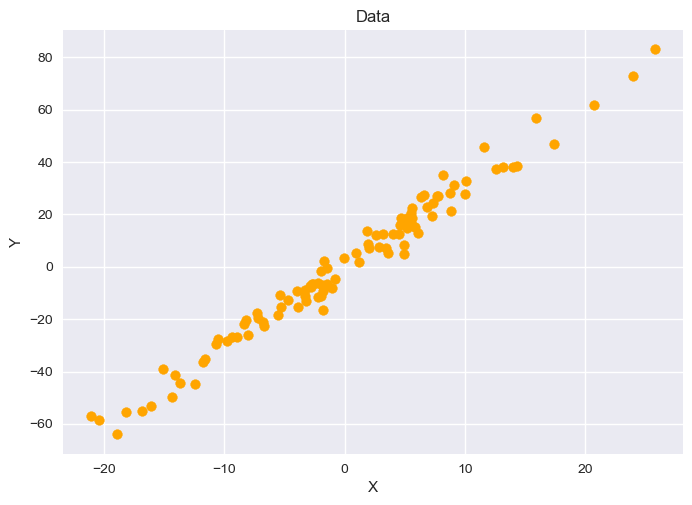

In [7]:
def plotData(X,y,color='orange',title="Data"):
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.scatter(X,y,c=color)
    plt.show()
plotData(X,y)

In [8]:
def normalizationData(X):
    X=(X-X.mean())/X.std()
    return X

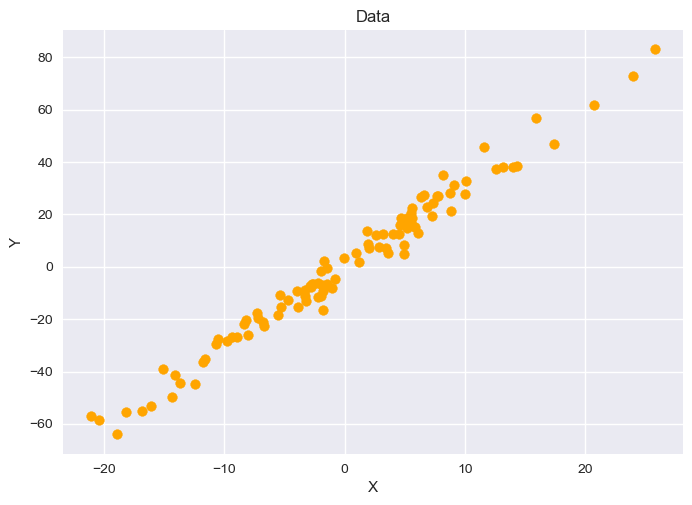

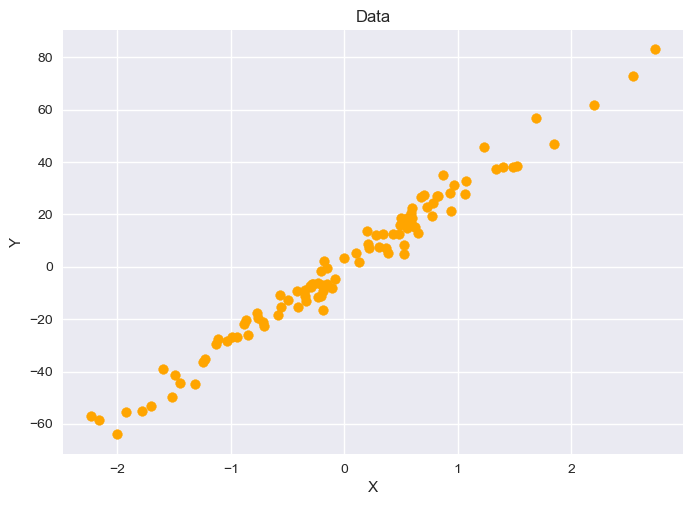

In [9]:
plotData(X,y)
X=normalizationData(X)
plotData(X,y)

In [26]:
X.mean(),X.std()

(-2.220446049250313e-18, 1.0)

In [55]:
  def trainTestSplit(X,y,split=0.8):
      m=X.shape[0]
      data=np.zeros((m,2))
      data[:,0]=X;
      data[:,1]=y;
      np.random.shuffle(data)
      
      split=int(m*split)
      XT=data[:split,0]
      yT=data[:split,1]
      Xt=data[split:,0]
      yt=data[split:,1]
      return XT,yT,Xt,yt;

In [57]:
XT,yT,Xt,yt=trainTestSplit(X,y)

In [59]:
print(XT.shape,yT.shape)
print(Xt.shape,yt.shape)

(80,) (80,)
(20,) (20,)


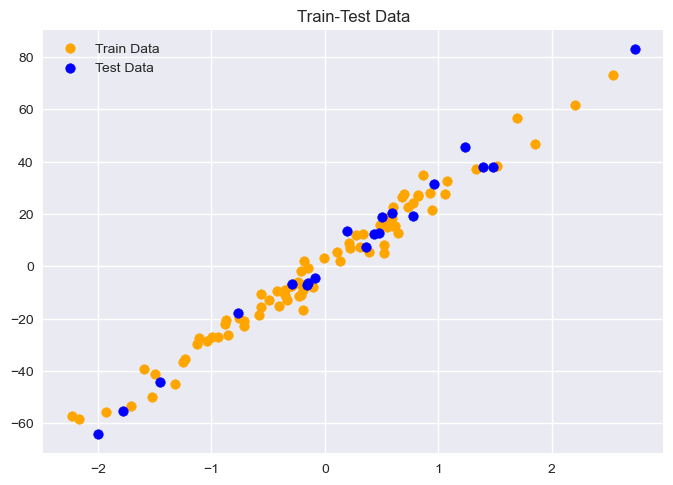

In [61]:
plt.scatter(XT,yT,color='orange',label="Train Data")
plt.scatter(Xt,yt,color='blue',label="Test Data")
plt.title("Train-Test Data")
plt.legend()
plt.show()

In [63]:
# Building Model

In [65]:
# hypothesis function 
def hypothesis(X,theta):
    return theta[0]+theta[1]*X;


# mean square error
def error(X,y,theta):
    m=X.shape[0]
    e=0
    for i in range(m):
        y_i=hypothesis(X[i],theta)
        e=e+(y[i]-y_i)**2
    return e/(2*m)

def gradient(X,y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))

    for i in range(m):
        exp = hypothesis(X[i], theta)
        grad[0] += (exp - y[i])          # ∂J/∂θ0
        grad[1] += (exp - y[i]) * X[i]   # ∂J/∂θ1

    grad = grad/m
    return grad

# train our model 
# loop  until convergence 
def train(X,y,learning_rate=0.1):
    theta=np.zeros((2,))

    maxItrs=100
    error_list=[]
    for i in range(maxItrs):
        grad=gradient(X,y,theta)
        error_list.append(error(X,y,theta))
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
    plt.plot(error_list)
    plt.xlabel("Iterations")
    plt.ylabel("Error (Cost J(θ))")
    plt.title("Error vs Iteration")
    # plt.grid(True)
    plt.show()
    return theta

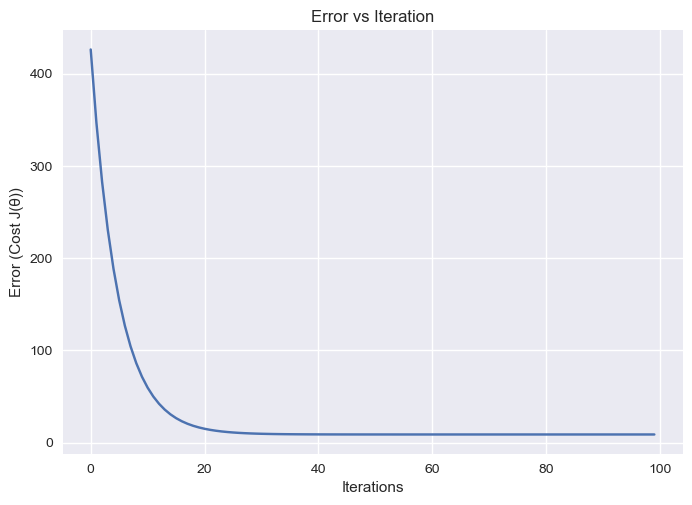

In [67]:
theta=train(X,y)

In [69]:
theta

array([ 0.27023042, 28.89827825])

In [71]:
def predict(X,theta):
    # theta[0]+theta[1]*X==hypothesis
    return hypothesis(X,theta)

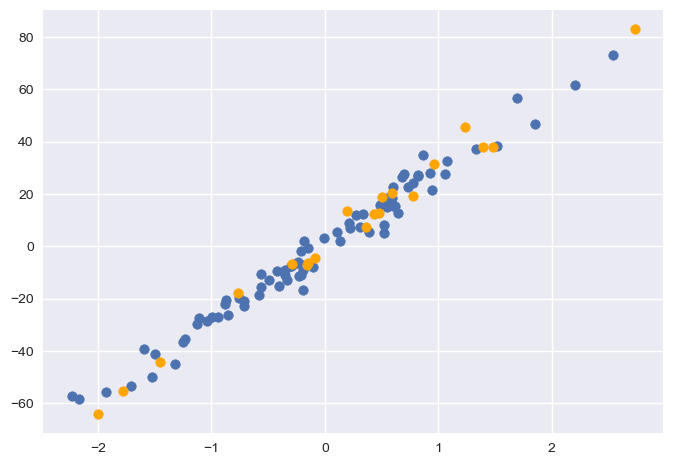

In [73]:
plt.scatter(XT,yT)
plt.scatter(Xt,yt,color='orange')

In [75]:
yp=predict(Xt,theta)

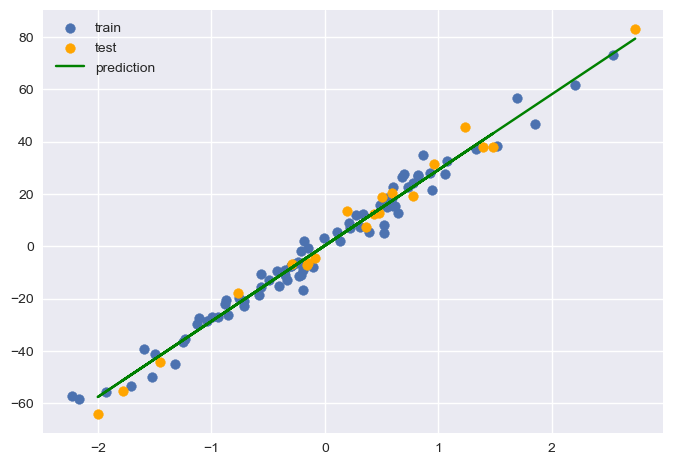

In [77]:
plt.scatter(XT,yT,label='train')
plt.scatter(Xt,yt,color='orange',label='test')
plt.plot(Xt,yp,color='green',label='prediction')
plt.legend()
plt.show()

In [83]:
# model evaluation 
def r2score(y,yp):
    ymean=y.mean()
    num=np.sum((y-yp)**2)
    denom=np.sum((y-ymean)**2)
    return 1-num/denom

r2score(yt,yp)

0.9842901662913556

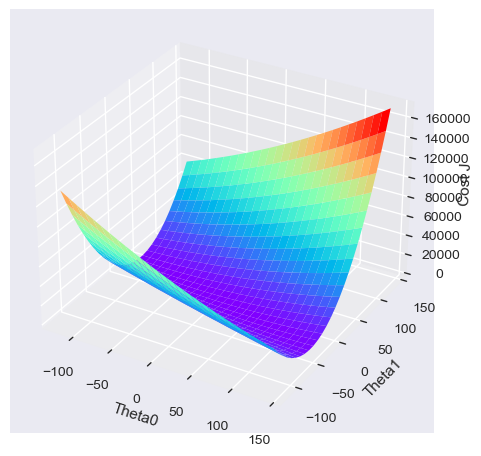

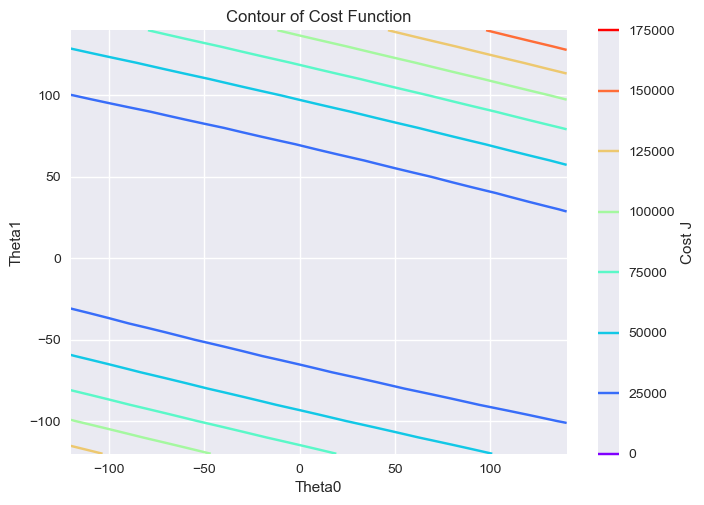

In [126]:
# visualising the training process
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

T0 = np.arange(-120, 150, 10)
T1 = np.arange(-120, 150, 10)

T0, T1 = np.meshgrid(T0, T1)
J = np.zeros(T0.shape)

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        yp = T1[i, j] * X + T0[i, j]
        J[i, j] = np.mean((y - yp) ** 2) / 2

# 3D Surface Plot
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.plot_surface(T0, T1, J, cmap='rainbow')
axes.set_xlabel('Theta0')
axes.set_ylabel('Theta1')
axes.set_zlabel('Cost J')
plt.show()

# Contour Plot
fig = plt.figure()
plt.contour(T0, T1, J, cmap='rainbow')
plt.xlabel('Theta0')
plt.ylabel('Theta1')
plt.title('Contour of Cost Function')
plt.colorbar(label='Cost J')
plt.show()